# Image Classification Project - Fruits & Vegetables Classification

In [ ]:
# https://drive.google.com/file/d/1VcFifIS-jsuyZsZydlz33sqHe96AdrT5/view?usp=drive_link
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1VcFifIS-jsuyZsZydlz33sqHe96AdrT5' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1VcFifIS-jsuyZsZydlz33sqHe96AdrT5" -O '/tmp/fruits_vegetables.zip' && rm -rf /tmp/cookies.txt

--2023-12-10 17:58:35--  https://docs.google.com/uc?export=download&confirm=t&id=1VcFifIS-jsuyZsZydlz33sqHe96AdrT5
Resolving docs.google.com (docs.google.com)... 74.125.142.102, 74.125.142.113, 74.125.142.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-04-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d2kbfcvmqq6iaub939regumpavkf7tr1/1702231050000/03785134766328211481/*/1VcFifIS-jsuyZsZydlz33sqHe96AdrT5?e=download&uuid=fab91d3a-d501-44c3-853e-ace7ce11fdc6 [following]
--2023-12-10 17:58:35--  https://doc-0o-04-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d2kbfcvmqq6iaub939regumpavkf7tr1/1702231050000/03785134766328211481/*/1VcFifIS-jsuyZsZydlz33sqHe96AdrT5?e=download&uuid=fab91d3a-d501-44c3-853e-ace7ce11fdc6
Resolving doc-0o-04-docs.googleusercontent.com (doc-0o-04-docs.googleusercontent.com)... 74.125.197.132, 

In [ ]:
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime as dt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [ ]:
local_zip = '/tmp/fruits_vegetables.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
train_path = '/content/fruits_vegetables/train'
val_path = '/content/fruits_vegetables/validation'
test_path = '/content/fruits_vegetables/test'

In [ ]:
img_width = 180
img_height = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_path,
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=False,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=False,
    validation_split=False
)

Found 359 files belonging to 36 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


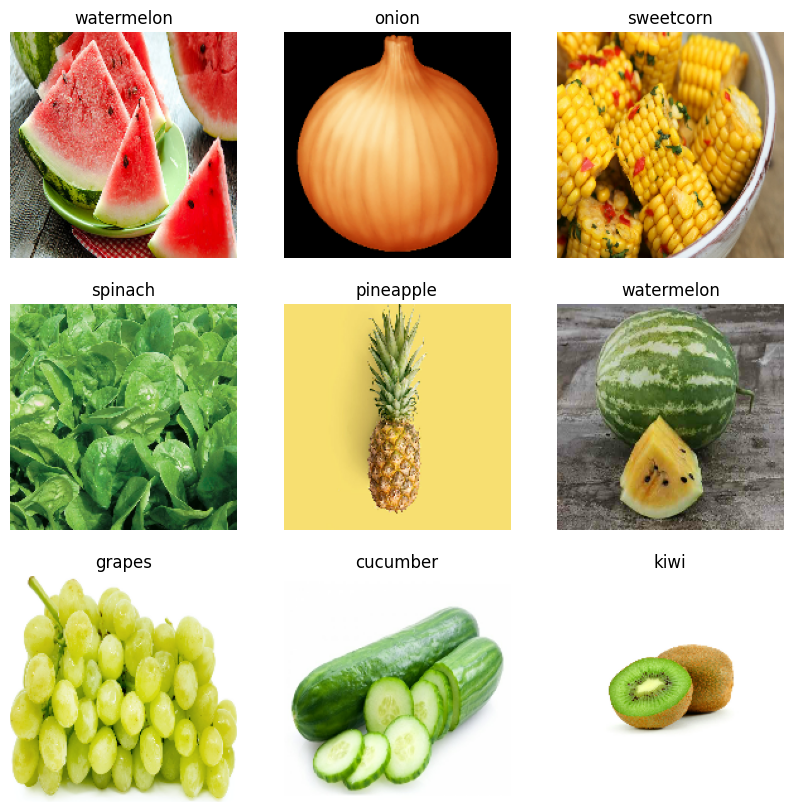

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, name='outputs')
])

# model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

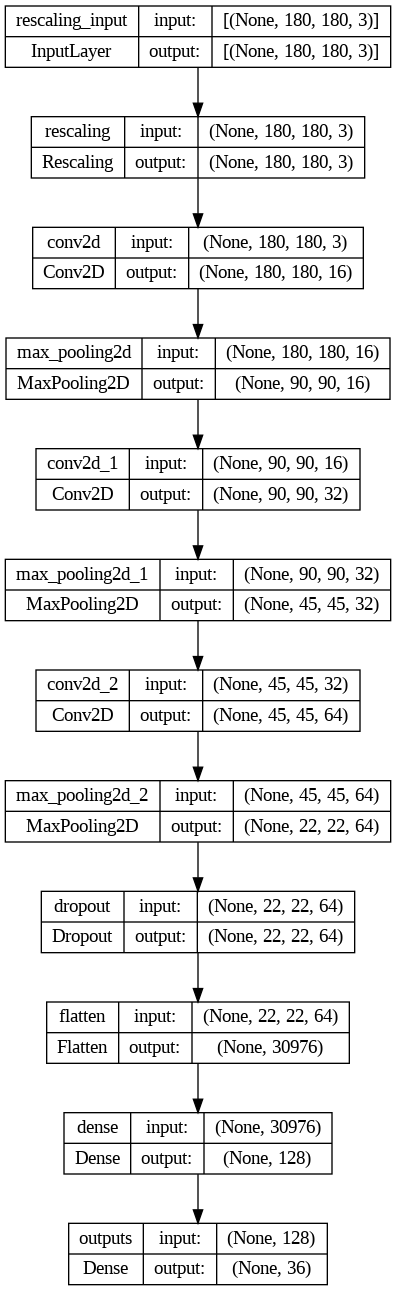

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, )

In [ ]:
start = dt.datetime.now()

epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

end = dt.datetime.now()
elapsed_time = end - start
print('\nTraining time:', elapsed_time)

Epoch 1/25
98/98 [==============================] - 84s 687ms/step - loss: 3.5032 - accuracy: 0.0510 - val_loss: 3.2124 - val_accuracy: 0.0826
Epoch 2/25
98/98 [==============================] - 64s 612ms/step - loss: 2.9254 - accuracy: 0.1592 - val_loss: 2.2484 - val_accuracy: 0.3789
Epoch 3/25
98/98 [==============================] - 77s 735ms/step - loss: 2.3924 - accuracy: 0.3037 - val_loss: 1.6788 - val_accuracy: 0.4900
Epoch 4/25
98/98 [==============================] - 66s 623ms/step - loss: 2.0229 - accuracy: 0.3929 - val_loss: 1.2560 - val_accuracy: 0.6610
Epoch 5/25
98/98 [==============================] - 64s 608ms/step - loss: 1.6998 - accuracy: 0.5014 - val_loss: 0.9330 - val_accuracy: 0.7350
Epoch 6/25
98/98 [==============================] - 65s 604ms/step - loss: 1.3256 - accuracy: 0.5994 - val_loss: 0.6680 - val_accuracy: 0.8177
Epoch 7/25
98/98 [==============================] - 62s 597ms/step - loss: 0.9906 - accuracy: 0.6947 - val_loss: 0.5130 - val_accuracy: 0.8632

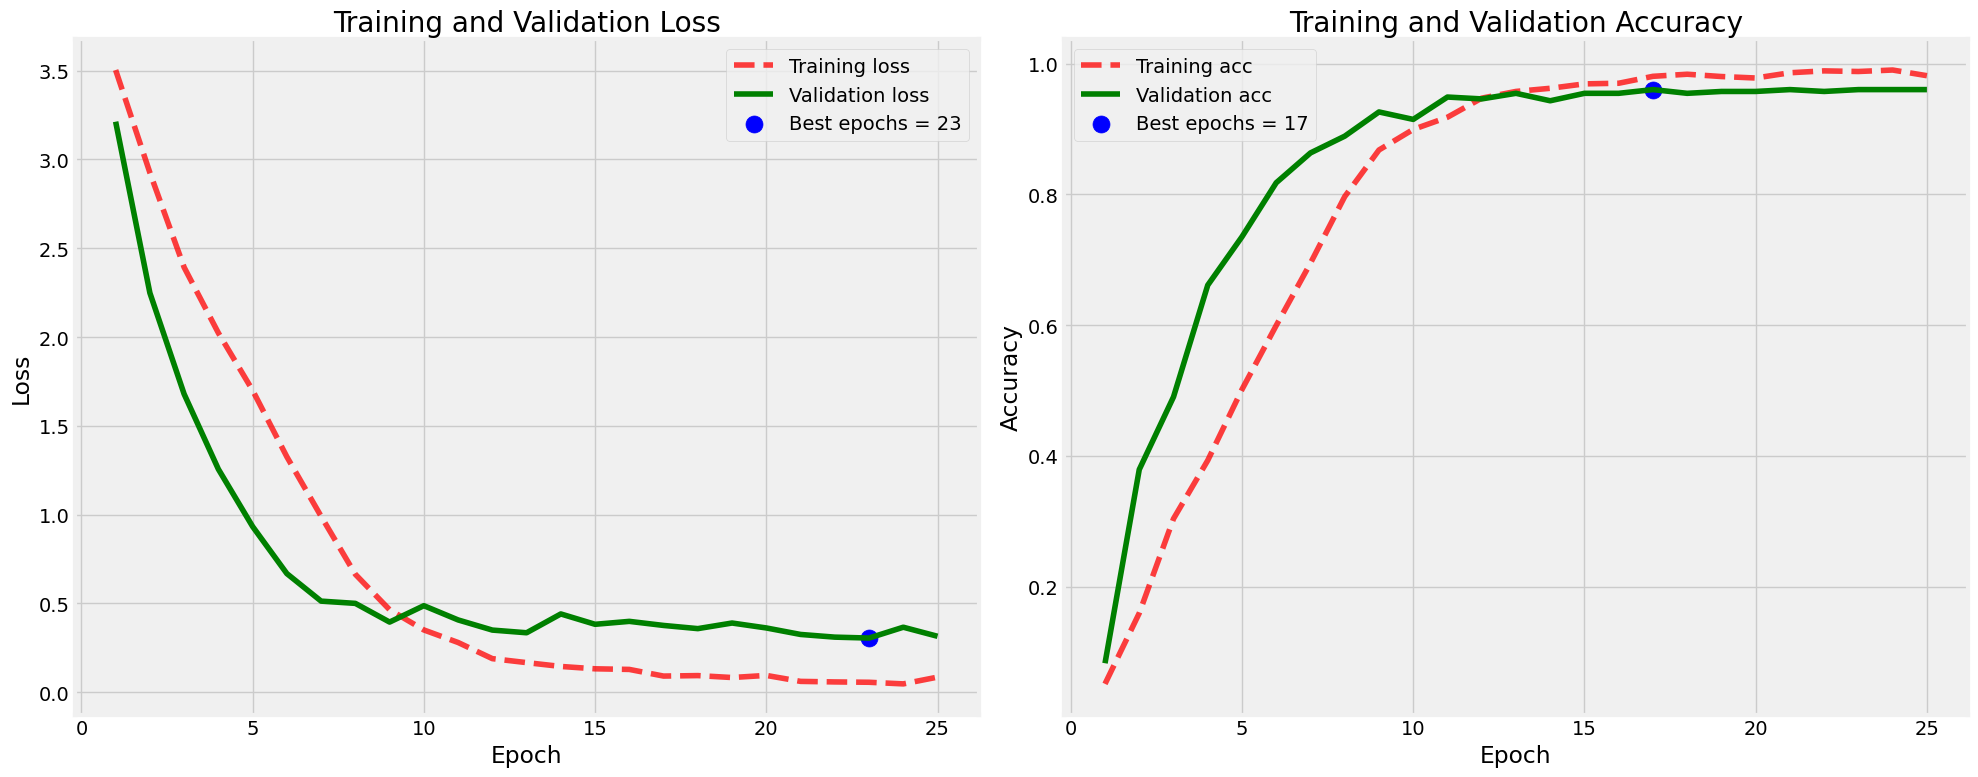

In [ ]:
# mengambil nilai
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
epochs = [i+1 for i in range(len(acc))]

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

# plot loss
plt.subplot(1, 2, 1)
plt.title('Training and Validation Loss')
plt.plot(epochs, loss, 'r', linestyle='--', alpha=0.75, label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='b', label=loss_label)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# plot accuracy
plt.subplot(1, 2, 2)
plt.title('Training and Validation Accuracy')
plt.plot(epochs, acc, 'r', linestyle='--', alpha=0.75, label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.scatter(index_acc + 1, val_highest, s=150, c='b', label=acc_label)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
image_path = "/content/fruits_vegetables/test/tomato/Image_5.jpg"

img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 186ms/step
This image most likely belongs to tomato with a 99.71 percent confidence.


In [ ]:
image_path = "/content/fruits_vegetables/test/carrot/Image_7.JPG"

img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 19ms/step
This image most likely belongs to carrot with a 99.97 percent confidence.


In [ ]:
image_path = "/content/fruits_vegetables/test/banana/Image_8.jpg"

img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 18ms/step
This image most likely belongs to banana with a 99.79 percent confidence.


In [ ]:
model.save('model.keras')